In [1]:
from functions import *

In [2]:
n = 10
T = 6
show_ticks = False
m = RandomIsingModel(n, seed=3)
print(m)

Ising model information:
Number of spins: 10
External fields (h): [ 1.78862847  0.43650985  0.09649747 -1.8634927  -0.2773882  -0.35475898
 -0.08274148 -0.62700068 -0.04381817 -0.47721803]
Interaction matrix (J):
[[ 0.          0.43650985  0.09649747 -1.8634927  -0.2773882  -0.35475898
  -0.08274148 -0.62700068 -0.04381817 -0.47721803]
 [ 0.43650985  0.          0.88131804  1.70957306  0.05003364 -0.40467741
  -0.54535995 -1.54647732  0.98236743 -1.10106763]
 [ 0.09649747  0.88131804  0.          0.23671627 -1.02378514 -0.7129932
   0.62524497 -0.16051336 -0.76883635 -0.23003072]
 [-1.8634927   1.70957306  0.23671627  0.         -0.80376609 -2.41908317
  -0.92379202 -1.02387576  1.12397796 -0.13191423]
 [-0.2773882   0.05003364 -1.02378514 -0.80376609  0.         -0.58859438
  -0.8738823   0.02971382 -2.24825777 -0.26776186]
 [-0.35475898 -0.40467741 -0.7129932  -2.41908317 -0.58859438  0.
   0.84583341 -1.86088953 -0.6028851  -1.91447204]
 [-0.08274148 -0.54535995  0.62524497 -0.92379

# Lexicographic order

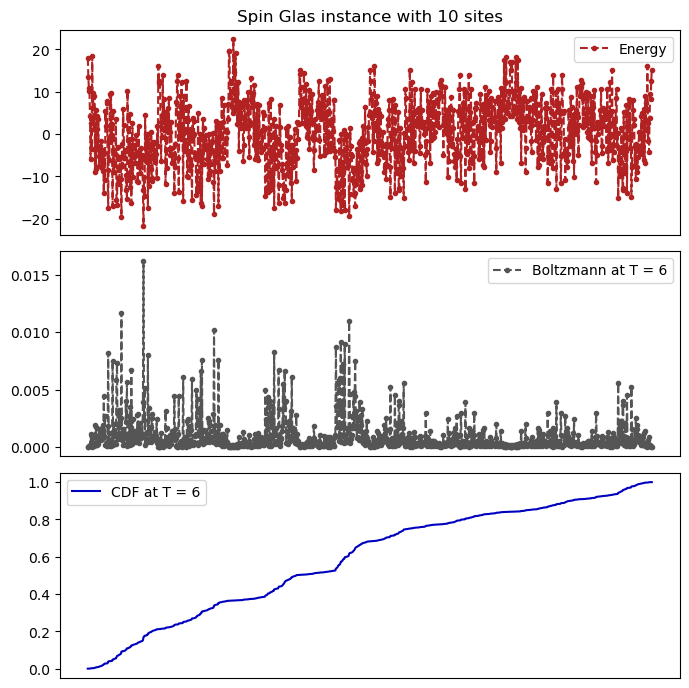

In [3]:
x = [int_to_bin(i, n) for i in range(2**n)]
boltzmann = np.exp(-m.E / T) / sum(np.exp(-m.E / T))

plt.figure(figsize=(7,7))
plt.subplot(311)
plt.plot(x, m.E, '.--', color=red, label='Energy')
plt.title(f'Spin Glas instance with {n} sites')
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.subplot(312)
plt.plot(x, boltzmann, '.--', color=dark_grey, label=f'Boltzmann at T = {T}')
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
# plt.ylim(-0.05, max(boltzmann)+0.1)
# plt.axhline(0, alpha=0.4, color=grey, zorder=-1)
plt.legend()

plt.subplot(313)
plt.plot(x, np.cumsum(boltzmann), label=f'CDF at T = {T}', color=blue)
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.tight_layout()
plt.show()

# Sorted by energy

In [4]:
E_sorted = np.array([E for E,_ in sorted(zip(m.E, x))])
x_sorted = [x for _,x in sorted(zip(m.E, x))]

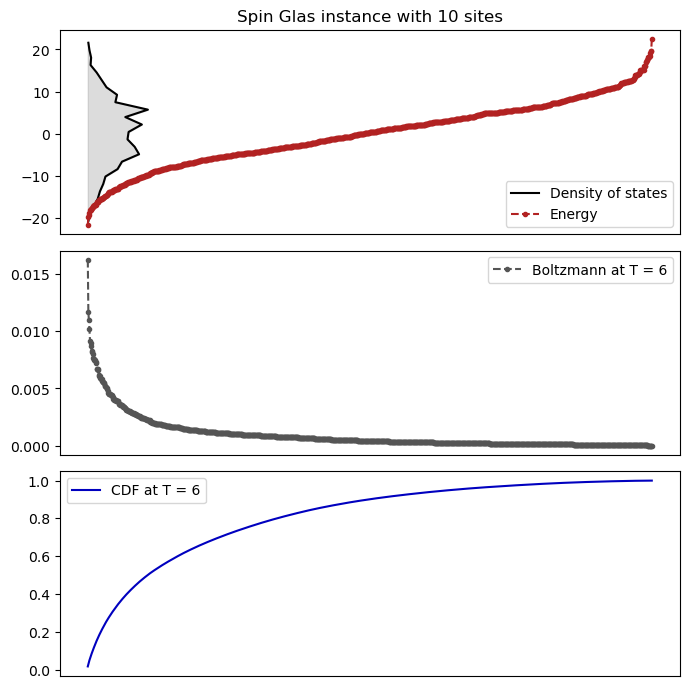

In [79]:
boltzmann_sorted = np.exp(-E_sorted / T) / sum(np.exp(-E_sorted / T))

plt.figure(figsize=(7,7))
plt.subplot(311)
plt.title(f'Spin Glas instance with {n} sites')
h,e = np.histogram(E_sorted, bins=25)
step = e[1] - e[0]
e_mids = e[:-1] + step/2
plt.plot(h, e_mids, color=black, label='Density of states')
plt.fill_betweenx(e_mids, h, color=grey, alpha=0.4)
plt.plot(x_sorted, E_sorted, '.--', color=red, label='Energy')

if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.subplot(312)
plt.plot(x_sorted, boltzmann_sorted, '.--', color=dark_grey, label=f'Boltzmann at T = {T}')
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
# plt.ylim(-0.05, max(boltzmann_sorted)+0.1)
# plt.axhline(0, alpha=0.4, color=grey, zorder=-1)
plt.legend()

plt.subplot(313)
plt.plot(x_sorted, np.cumsum(boltzmann_sorted), label=f'CDF at T = {T}', color=blue)
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.tight_layout()
plt.show()